In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
train=pd.read_csv('C:/Users/rsabharwal.admin/OneDrive - The University of Newcastle/ML in education/turkiye-student-evaluation_generic.csv')

In [3]:
train.head()

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
0,1,2,1,0,4,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
1,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
2,1,2,1,2,4,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
3,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
4,1,2,1,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


# DATA VISULIZATION

<AxesSubplot:xlabel='class', ylabel='count'>

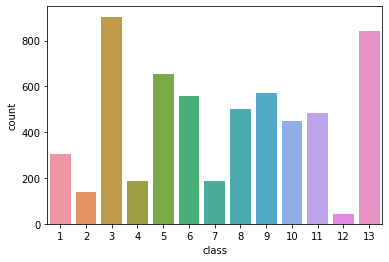

In [4]:
sns.countplot(x="class",data=train)

Number of course taken by Student(course No. 3 is student favourite,Course No. 12 is mostly disliked by them)

<AxesSubplot:xlabel='class', ylabel='count'>

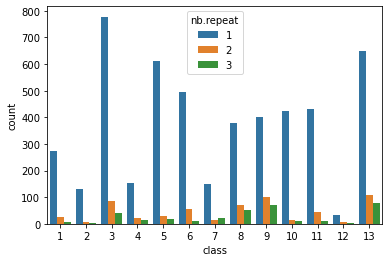

In [5]:
sns.countplot(x="class",hue="nb.repeat",data=train)

Course no. 13 is mostly repeated by students

<AxesSubplot:xlabel='nb.repeat', ylabel='count'>

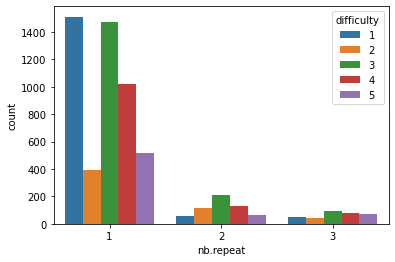

In [6]:
sns.countplot(x="nb.repeat",hue="difficulty",data=train)

Easy courses are also repeated by students

<AxesSubplot:xlabel='difficulty', ylabel='count'>

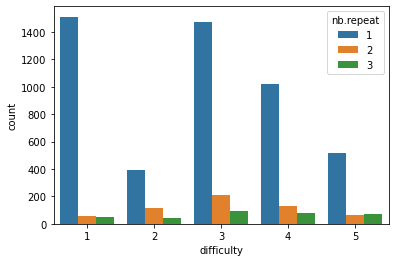

In [7]:
sns.countplot(x="difficulty",hue="nb.repeat",data=train)

<AxesSubplot:xlabel='difficulty', ylabel='count'>

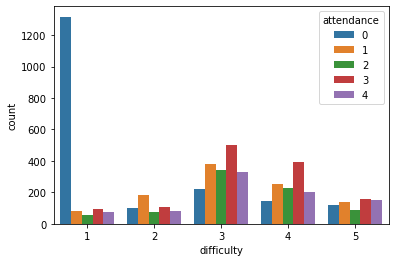

In [8]:
sns.countplot(x="difficulty",hue="attendance",data=train)

<AxesSubplot:xlabel='class', ylabel='count'>

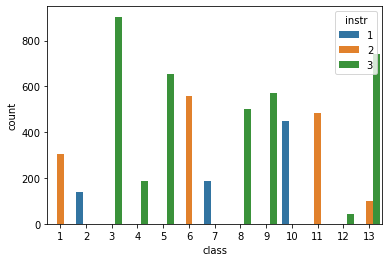

In [9]:
sns.countplot(x="class",hue="instr",data=train)

Instructor1:Course No.-2,7,10 Instructor2:Course No.-1,6,11,13 Instructor3:Course No.-3,4,5,8,9,12,13 Course No. 13 is jointly taken by Intructor1,Instructor2 Instructor1 is least popular May be

<AxesSubplot:xlabel='class', ylabel='count'>

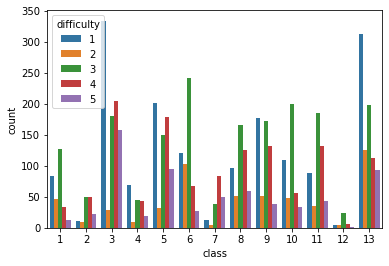

In [10]:
sns.countplot(x="class",hue="difficulty",data=train)

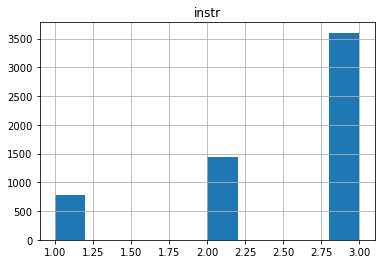

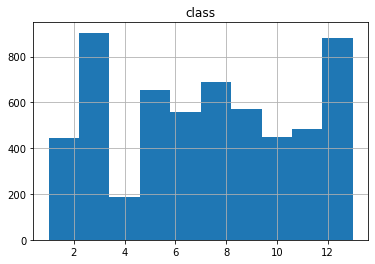

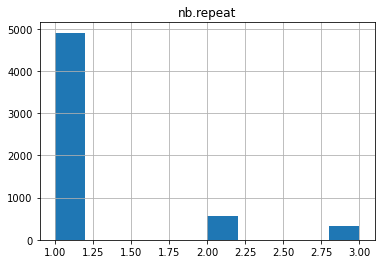

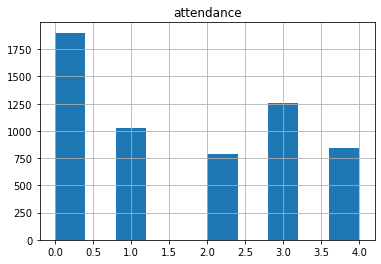

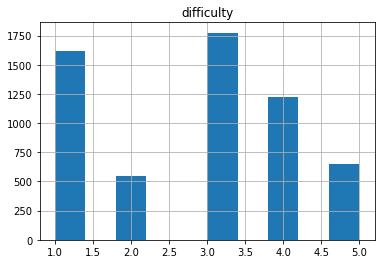

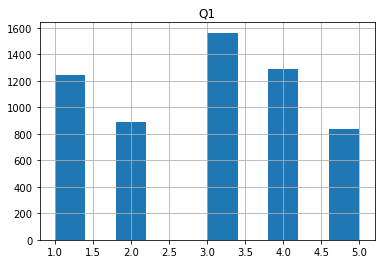

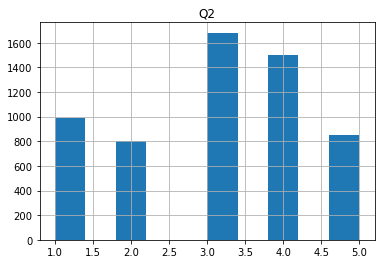

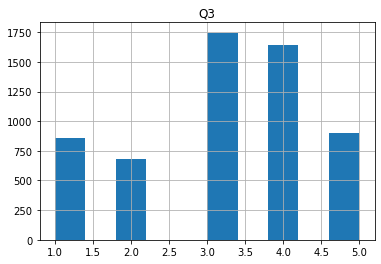

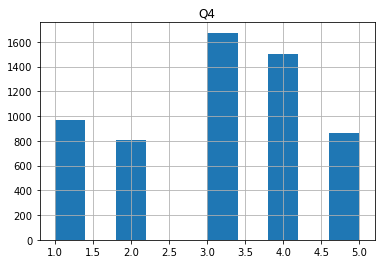

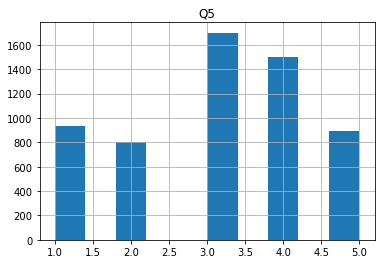

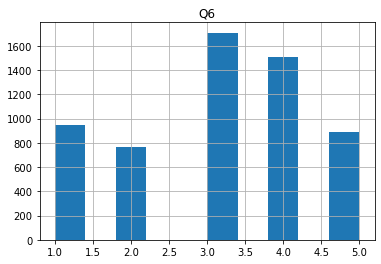

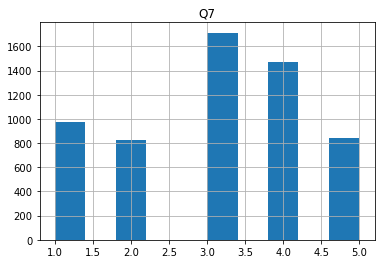

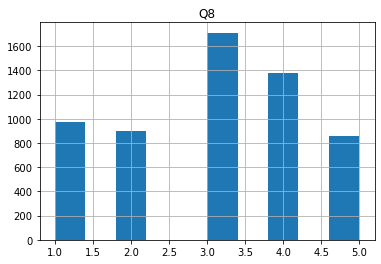

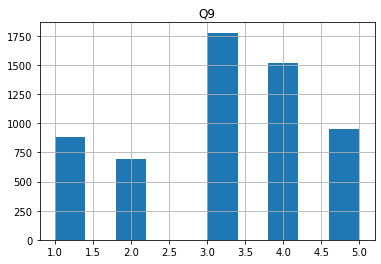

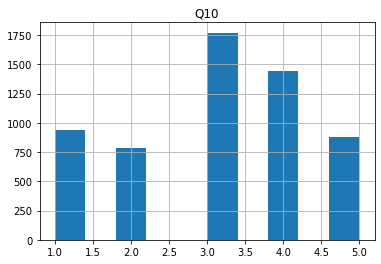

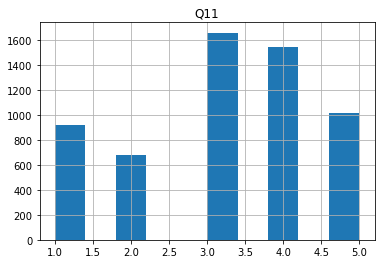

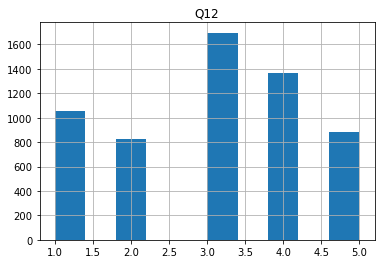

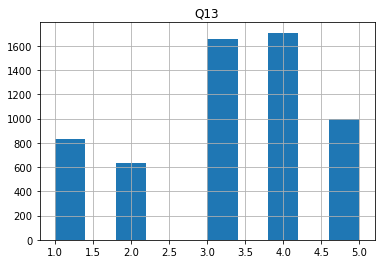

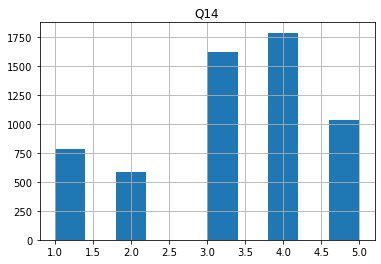

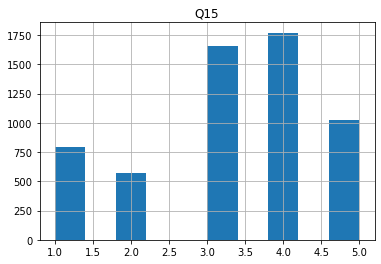

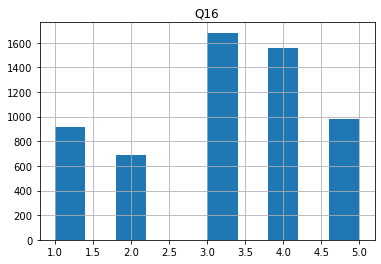

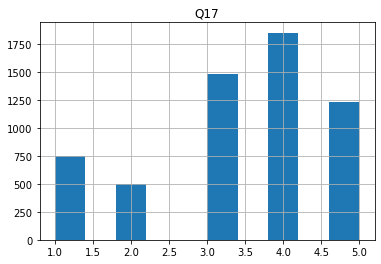

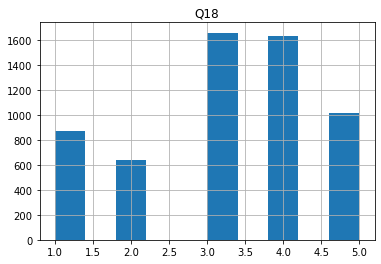

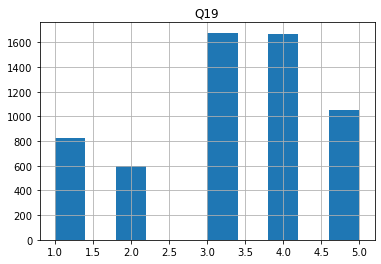

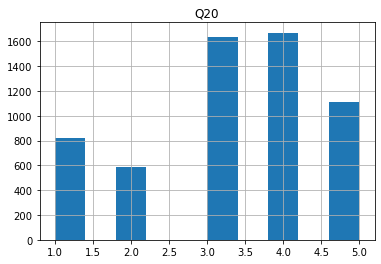

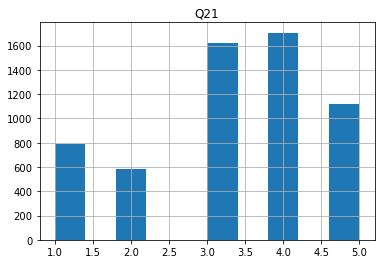

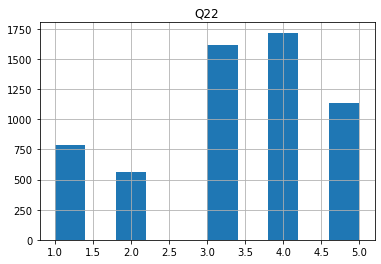

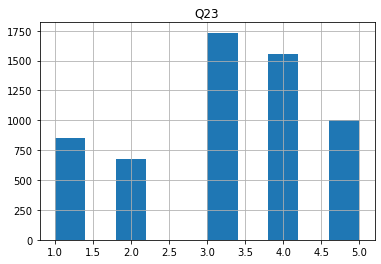

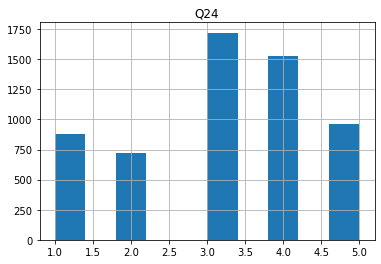

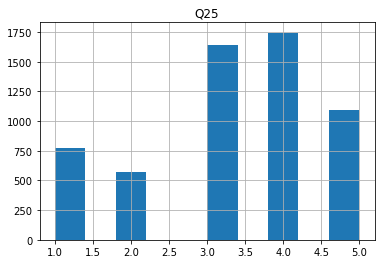

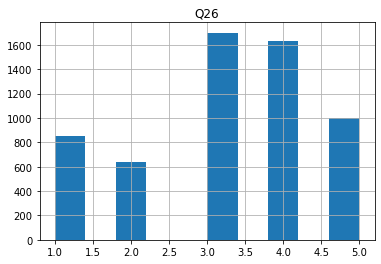

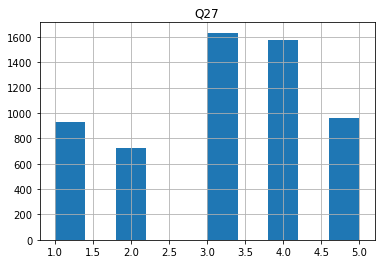

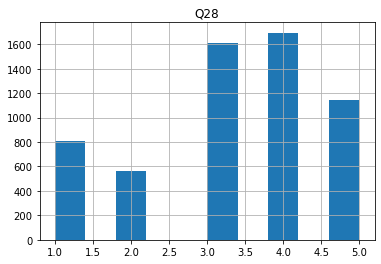

In [11]:
for i in train.columns:
    train.hist(i)
    plt.show()

# DATA PREPROCESSING

In [12]:
X_res=train.values

In [13]:
X_res

array([[ 1,  2,  1, ...,  3,  3,  3],
       [ 1,  2,  1, ...,  3,  3,  3],
       [ 1,  2,  1, ...,  5,  5,  5],
       ...,
       [ 3, 13,  1, ...,  5,  5,  5],
       [ 3, 13,  1, ...,  1,  1,  1],
       [ 3, 13,  1, ...,  1,  1,  1]], dtype=int64)

In [14]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
features=scaler.fit_transform(X_res)

In [15]:
features

array([[-2.06785045, -1.43071903, -0.40217401, ..., -0.17485237,
        -0.11984497, -0.24094785],
       [-2.06785045, -1.43071903, -0.40217401, ..., -0.17485237,
        -0.11984497, -0.24094785],
       [-2.06785045, -1.43071903, -0.40217401, ...,  1.39922464,
         1.42842963,  1.32326465],
       ...,
       [ 0.71607035,  1.55204221, -0.40217401, ...,  1.39922464,
         1.42842963,  1.32326465],
       [ 0.71607035,  1.55204221, -0.40217401, ..., -1.74892938,
        -1.66811957, -1.80516036],
       [ 0.71607035,  1.55204221, -0.40217401, ..., -1.74892938,
        -1.66811957, -1.80516036]])

# Lets begin to cluster the students based on the questionaire data

In [16]:
from sklearn.cluster import KMeans
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(features)

In [17]:
kmeans.labels_

array([1, 1, 3, ..., 3, 0, 0])

In [18]:
kmeans.inertia_

60429.48518647458

Lets find suitable value for k using elbow method and silhoutte score

In [19]:
m=[]
for k in range(1,80):
    km=KMeans(n_clusters=k, random_state=42).fit(features)
    m.append(km.inertia_)


In [20]:
m

[192060.0000000012,
 105150.06655006793,
 73956.57647075695,
 65555.53817831163,
 60429.48518647457,
 57626.85451234793,
 55864.94798424218,
 54405.82220618757,
 52894.24094707209,
 51563.43991430417,
 50564.60379995924,
 49697.22807912143,
 48608.84234065771,
 48008.61235665552,
 47113.75304121614,
 46192.73185525687,
 45616.63187649347,
 44804.82637773641,
 44213.64625485957,
 44368.63290254333,
 43123.40705046221,
 43001.698144178226,
 42318.29785274508,
 41697.93018003216,
 41269.830982345564,
 40892.28162430022,
 40639.961002258904,
 40452.244495505016,
 40132.009975655026,
 39507.63912539074,
 39571.87359293943,
 39224.075253066134,
 38733.58271473903,
 38597.099279278416,
 38380.957147142464,
 38007.26792318008,
 37873.15613909715,
 37654.24065172142,
 37571.24302765275,
 37394.50444181573,
 37129.54292881853,
 37087.483295809274,
 36873.06084529553,
 36453.32179781391,
 36554.25649988997,
 36426.77083203016,
 36171.38580769635,
 35943.29895745436,
 35884.89827963612,
 35618.651

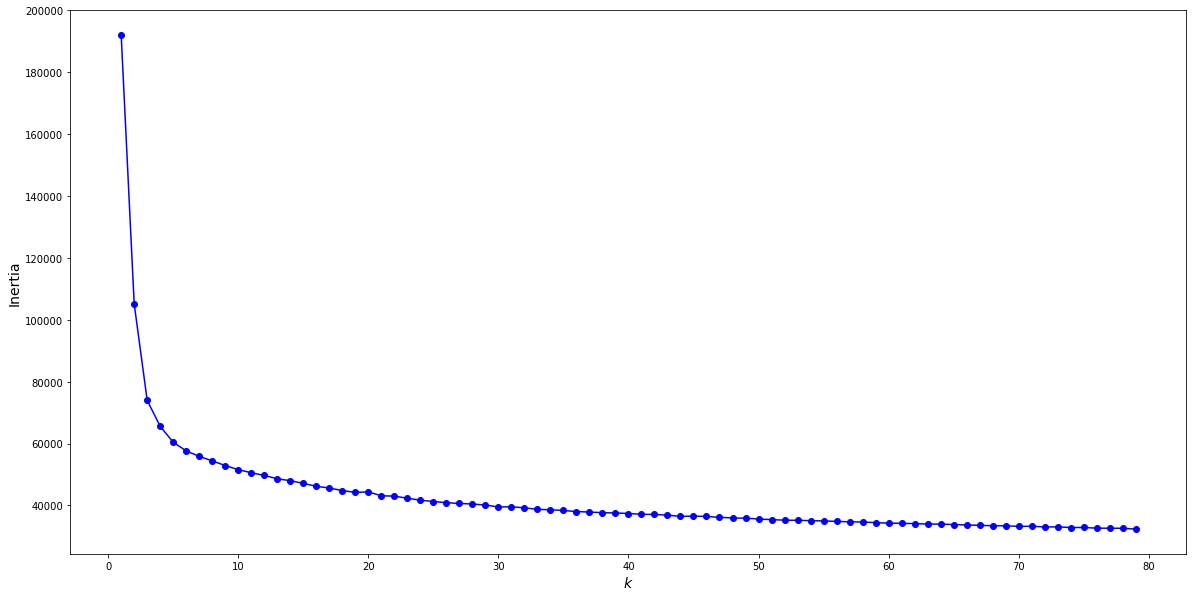

In [21]:
plt.figure(figsize=(20,10))
plt.plot(range(1, 80),m, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.show()

value of k will be between 0 to 10

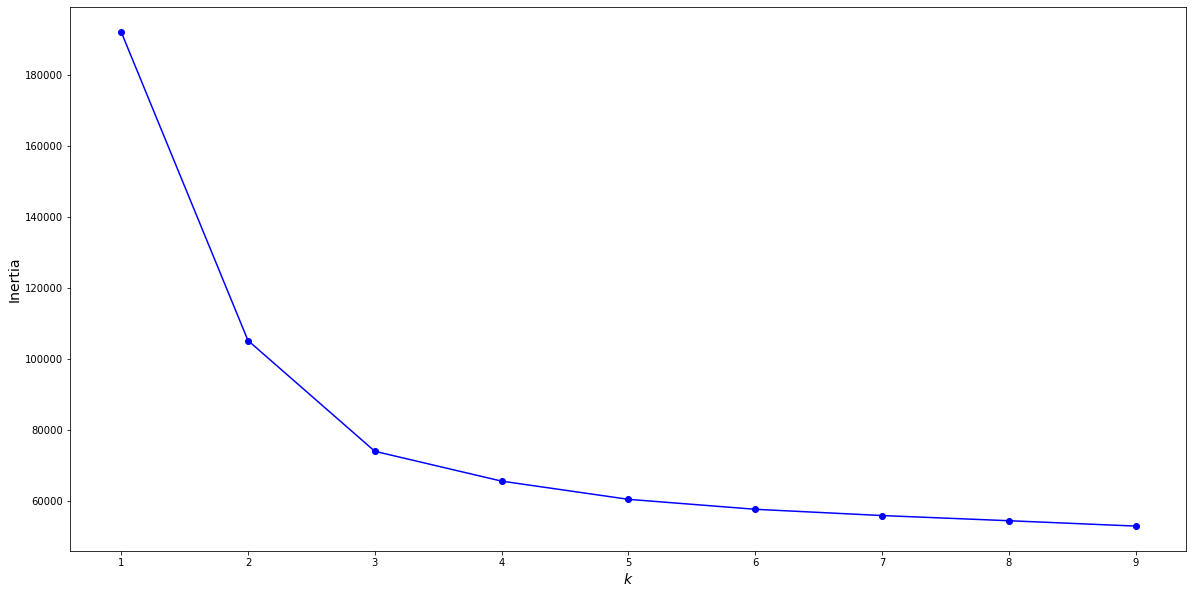

In [22]:
l=[]
p=[]
for k in range(1,10):
    km=KMeans(n_clusters=k, random_state=42).fit(features)
    l.append(km.inertia_)
    p.append(km)
plt.figure(figsize=(20,10))
plt.plot(range(1, 10),l, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.show()

value of k  may be 3 lets cross check using silhoutte score (l stores model inertia,p stores all model

In [23]:
from sklearn.metrics import silhouette_score
silhouette_scores =[]
for model in p[1:]:
    s=silhouette_score(features, model.labels_)
    silhouette_scores.append(s)
    

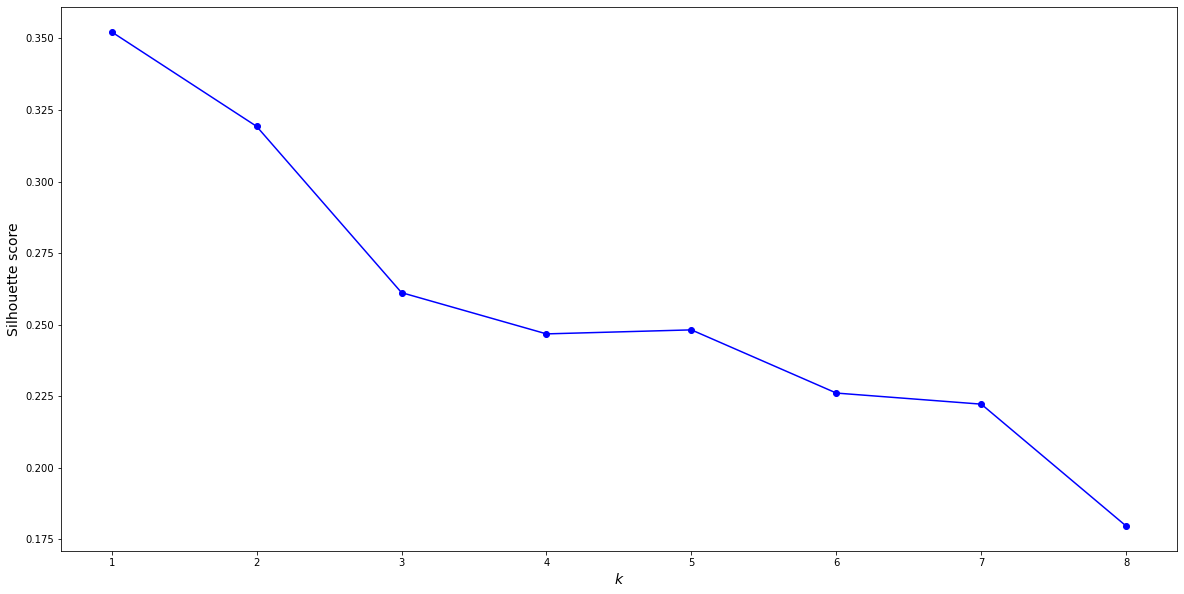

In [24]:
plt.figure(figsize=(20, 10))
plt.plot(range(1, 9),silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)

plt.show()



Silhoutte curve is not as we want(their might be some error)

# May be we should try reducing dimensions before clustering 

In [25]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)


In [26]:
f=pca.fit_transform(features)

In [27]:
f

array([[ 0.74231262, -0.10972028],
       [ 0.72750008, -0.14714609],
       [-7.58649782,  0.36422966],
       ...,
       [-7.43229258, -0.79495905],
       [ 9.11140595, -0.56513996],
       [ 9.11140595, -0.56513996]])

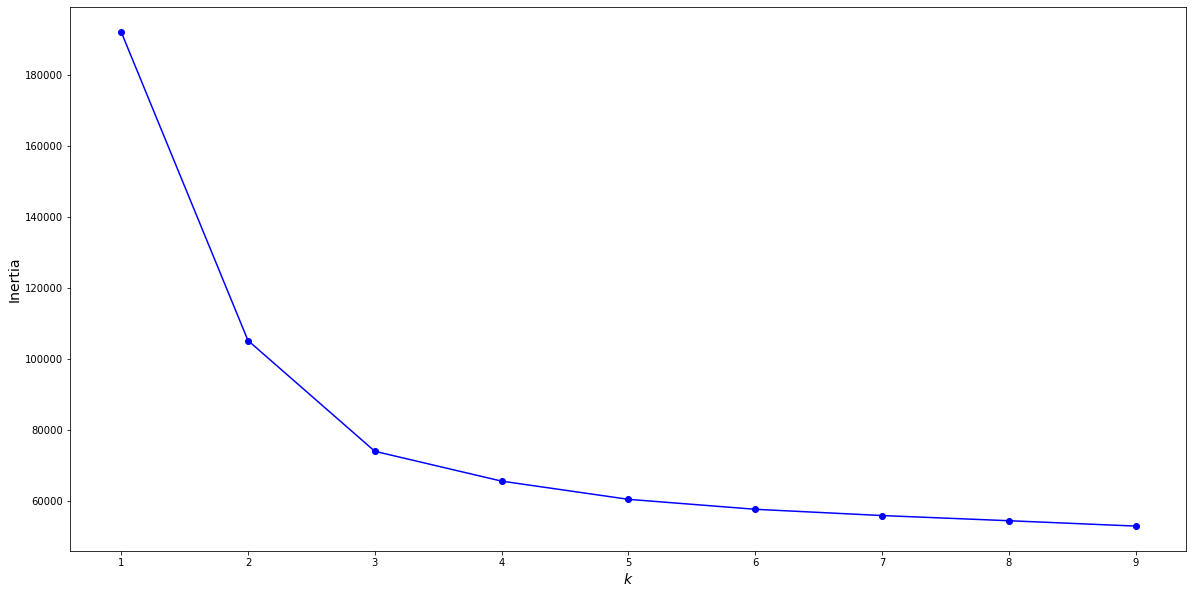

In [28]:
l=[]
p=[]
for k in range(1,10):
    km=KMeans(n_clusters=k, random_state=42).fit(features)
    l.append(km.inertia_)
    p.append(km)
plt.figure(figsize=(20,10))
plt.plot(range(1, 10),l, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.show()

Elbow method again giving value of k to be 3 or 4

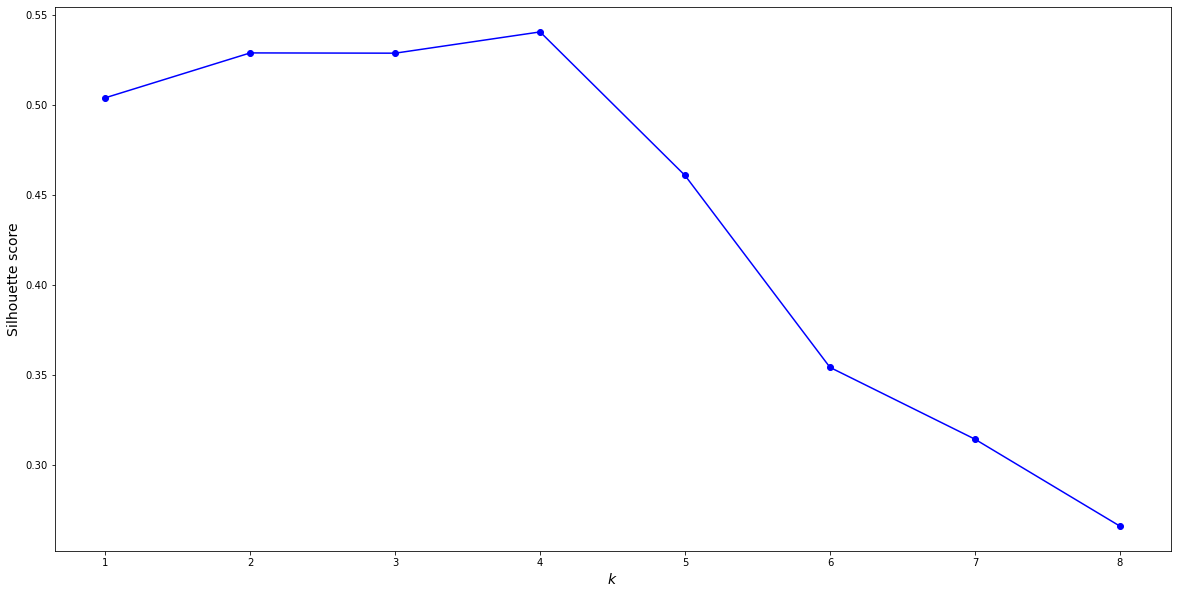

In [29]:
silhouette_scores =[]
for model in p[1:]:
    s=silhouette_score(f, model.labels_)
    silhouette_scores.append(s)
plt.figure(figsize=(20, 10))
plt.plot(range(1, 9),silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.show()  

k=4 is the best value for number of cluster(Elbow method is giving k=3,4 silhoutte scores is giving k=4 so intersection will be k=4)

Clustering after PCA in this case produce better silhoutte scores graph

In [30]:
kmeans = KMeans(n_clusters=4, random_state=42)
y_pred = kmeans.fit_predict(f)

In [31]:
t=kmeans.labels_

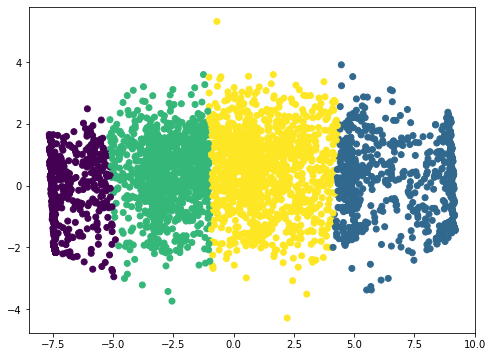

In [32]:
plt.figure(figsize=(8, 6))
plt.scatter(f[:,0], f[:,1], c=kmeans.labels_.astype(float))
plt.show()

In [33]:
# Let me check the count of students in each cluster
import collections
collections.Counter(y_pred)

Counter({3: 2097, 0: 860, 1: 1205, 2: 1658})

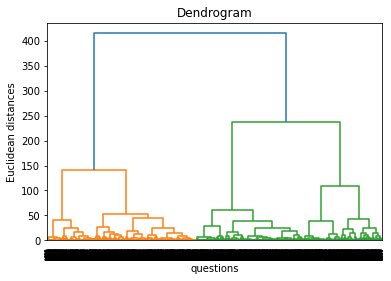

In [34]:
# Using the dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(f, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('questions')
plt.ylabel('Euclidean distances')
plt.show()

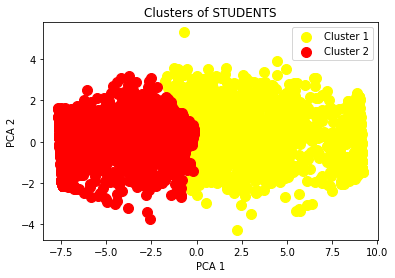

In [35]:
# Fitting Hierarchical Clustering to the dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(f)
X = f
# Visualising the clusters
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'yellow', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'red', label = 'Cluster 2')
plt.title('Clusters of STUDENTS')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.show()

In [36]:
# Let me check the count of students in each cluster
import collections
collections.Counter(y_hc)

Counter({0: 3218, 1: 2602})

If we compare the clusters of Kmeans and Hierarchical process, we can see cluster with red ( Negative is matching approximately)

# CLASSIFICATION ALGORITHM(MULTICLASS CLASSIFICATION)

# RANDOM FOREST CLASSIFIER IS THE BEST ALGORITHM TO SOLVE MULTICLASS CLASSIFICATION PROBLEMS

In [37]:
from sklearn.model_selection import train_test_split

np.random.seed(1234)

x_train,x_test,y_train,y_test = train_test_split(f,t, train_size=0.80, random_state=42)

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
rnd_clf = RandomForestClassifier(n_estimators=200, max_leaf_nodes=8, random_state=42)
cv_scores = cross_val_score(rnd_clf, x_train, y_train, cv=10)
cv_scores.mean()

0.9954894088328949

In [39]:
rnd_clf.fit(x_train,y_train)
rnd_clf.score(x_test,y_test)

0.9974226804123711

we are getting 99% accuracy

Lets try various n_estimators and max_leaf_nodes value

In [40]:
n_estimator=[10,100,400,500,600,700,800,2000]
max_leaf_nodes=[2,4,6,8,16]
for i in n_estimator:
    for k in max_leaf_nodes:
       rnd_clf = RandomForestClassifier(n_estimators=i, max_leaf_nodes=k, random_state=42)
       rnd_clf.fit(x_train, y_train)
       t=rnd_clf.score(x_test,y_test)
       print(i,k,t)
    print("-"*40)

10 2 0.6323024054982818
10 4 0.9957044673539519
10 6 0.9957044673539519
10 8 0.9974226804123711
10 16 0.9982817869415808
----------------------------------------
100 2 0.6486254295532646
100 4 0.9974226804123711
100 6 0.9982817869415808
100 8 0.9974226804123711
100 16 0.9982817869415808
----------------------------------------
400 2 0.6486254295532646
400 4 0.993127147766323
400 6 0.9982817869415808
400 8 0.9974226804123711
400 16 0.9982817869415808
----------------------------------------
500 2 0.6486254295532646
500 4 0.993127147766323
500 6 0.9982817869415808
500 8 0.9974226804123711
500 16 0.9982817869415808
----------------------------------------
600 2 0.6503436426116839
600 4 0.993127147766323
600 6 0.9982817869415808
600 8 0.9982817869415808
600 16 0.9982817869415808
----------------------------------------
700 2 0.6503436426116839
700 4 0.993127147766323
700 6 0.9982817869415808
700 8 0.9982817869415808
700 16 0.9982817869415808
----------------------------------------
800 2 0

Our Random Forest Classifier is giving as 99% accuracy (min hyperparameter value for best score n_estimator=500,max_leaf_nodes=6)